Carlo Antonio T. Taleon BSCS-2A | 2020-2021 | Written June 2021

# Heart Disease Classification Using KNN

This is my final project for the 2nd semester for my Introduction to Machine Learning class at WVSU-CICT.

This project showcases an end to end machine learning framework using the[ heart disease data from UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

## Problem Defintiion
> Given the clinical features on a patient, is it possible to predict if this person has heart disease?

## 1. Import modules

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import ConfusionMatrixDisplay

# 2. Importing and exploring the data

In [ ]:
df = pd.read_csv('../input/heart-disease-uci/heart.csv')
df.shape

In [ ]:
df.info()

In [ ]:
df.describe()

## Data Visualizations
Here I visualize the dataset in:
- Correlation Matrix
- Histogram
- Target Count

### Correlation Matrix
To check positive and negative correlations. Usually we would prefer to use only features that have **positive correlations** with the label, but there are values in this dataset are supposed to reasonably have a **negative correlation** with the label.

In [ ]:
# Correlation of features in the dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g = sns.heatmap(df[top_corr_features].corr(), annot=True, cmap="RdYlGn")

### Histogram
To check if each feature is normally distributed

In [ ]:
# Histogram
df.hist()

### Target Count
To check whether or not the data is balanced. Since the count of two classes are just about the same, we can say that this dataset is **balanced**.

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='target', data=df, palette='RdBu_r')

## Pre-processing the data
Before we put the data into the classifier. We need to do a couple things:
- Variables like 'sex', 'cp', 'fbs', 'restecg', 'exang','slope', 'ca', and 'thal' are supposedly categorical variables. So we need to convert them into dummy variables first using `get_dummies` to create dummy columns for them.

- Scale the rest of the variables using `StandardScaler` 

In [ ]:
# get_dummies
dataset = pd.get_dummies(df, columns = ['sex','cp','fbs','restecg','exang','slope','ca','thal'])

In [ ]:
# Standard Scaler
standardScaler = StandardScaler()
columns_to_scale = ['age','trestbps','chol','thalach','oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale]) 

In [ ]:
# Pre-processed dataset
dataset.head()

## Preparing the model and its inputs

In [ ]:
X = dataset.drop(['target'], axis = 1)
y = dataset['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1) # random_state=1 for same results every time.

### Choosing the best K
Here, we will be testing different k values and collecting all their accuracy scores with `knn_scores`. After that, we will use the k with the highest accuracy for the actual model

We set a range of n_neighbors from 1 to 21 and see which one is the best.

In [ ]:
knn_scores = []
for k in range(1, 21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score = cross_val_score(knn_classifier, X_train, y_train, cv=10)
    knn_scores.append(score.mean())

In [ ]:
plt.plot([k for k in range(1, 21)], knn_scores, color='red')
for i in range(1, 21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [ ]:
# Printing the best K
highest_accuracy = max(knn_scores)
index_with_highest = knn_scores.index(highest_accuracy)
best_k = index_with_highest + 1 # because index starts at 0
print(f"Index with Highest: {index_with_highest}")
print(f"Highest Accuracy: {highest_accuracy}")
print(f"Best K: {best_k}")

## Fitting training values to the best K classifier

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors = best_k)
knn_classifier.fit(X_train, y_train)

## Predicting on untrained inputs

### Heart Disease Diagnosis
Diagnosis of heart disease (angiographic disease status)

- Value 0: < 50% diameter narrowing

- Value 1: > 50% diameter narrowing

In [ ]:
label_names = ['< 50% diameter narrowing', '> 50% diameter narrowing']

# Predictions & Actual
predictions = knn_classifier.predict(X_test)
actual = y_test.to_numpy()

print(f"Predictions:\n{predictions}")
print(f"\nActual:\n{actual}")
print(f"\nScore: {knn_classifier.score(X_test, y_test)}")

# Classification Report
print(f"\n\nClassification Report:")
print(classification_report(actual, predictions, target_names=label_names))

# Confusion Matrix
print('\n\n')
cm = confusion_matrix(y_true=actual, y_pred=predictions)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names)
display.plot()
plt.title("Confusion Matrix")

## My Evaluation
- The model is not very accurate, misclassifying 8 for "< 50% diameter narrowing" and 9 for "> 50% diameter narrowing"
- Ideally it should have been at least 0.9 accuracy, but it's only under 0.80.
- Because this is a model that should be able to perform accurate heart disease diagnoses, an accuracy of under 0.80 is subpar.

## What could be improved
- The dataset could definitely make use of more pre-processing like removing features that don't have a positive correlation with the predicted value.
- Maybe more data?
- Maybe test the data with other classification models.
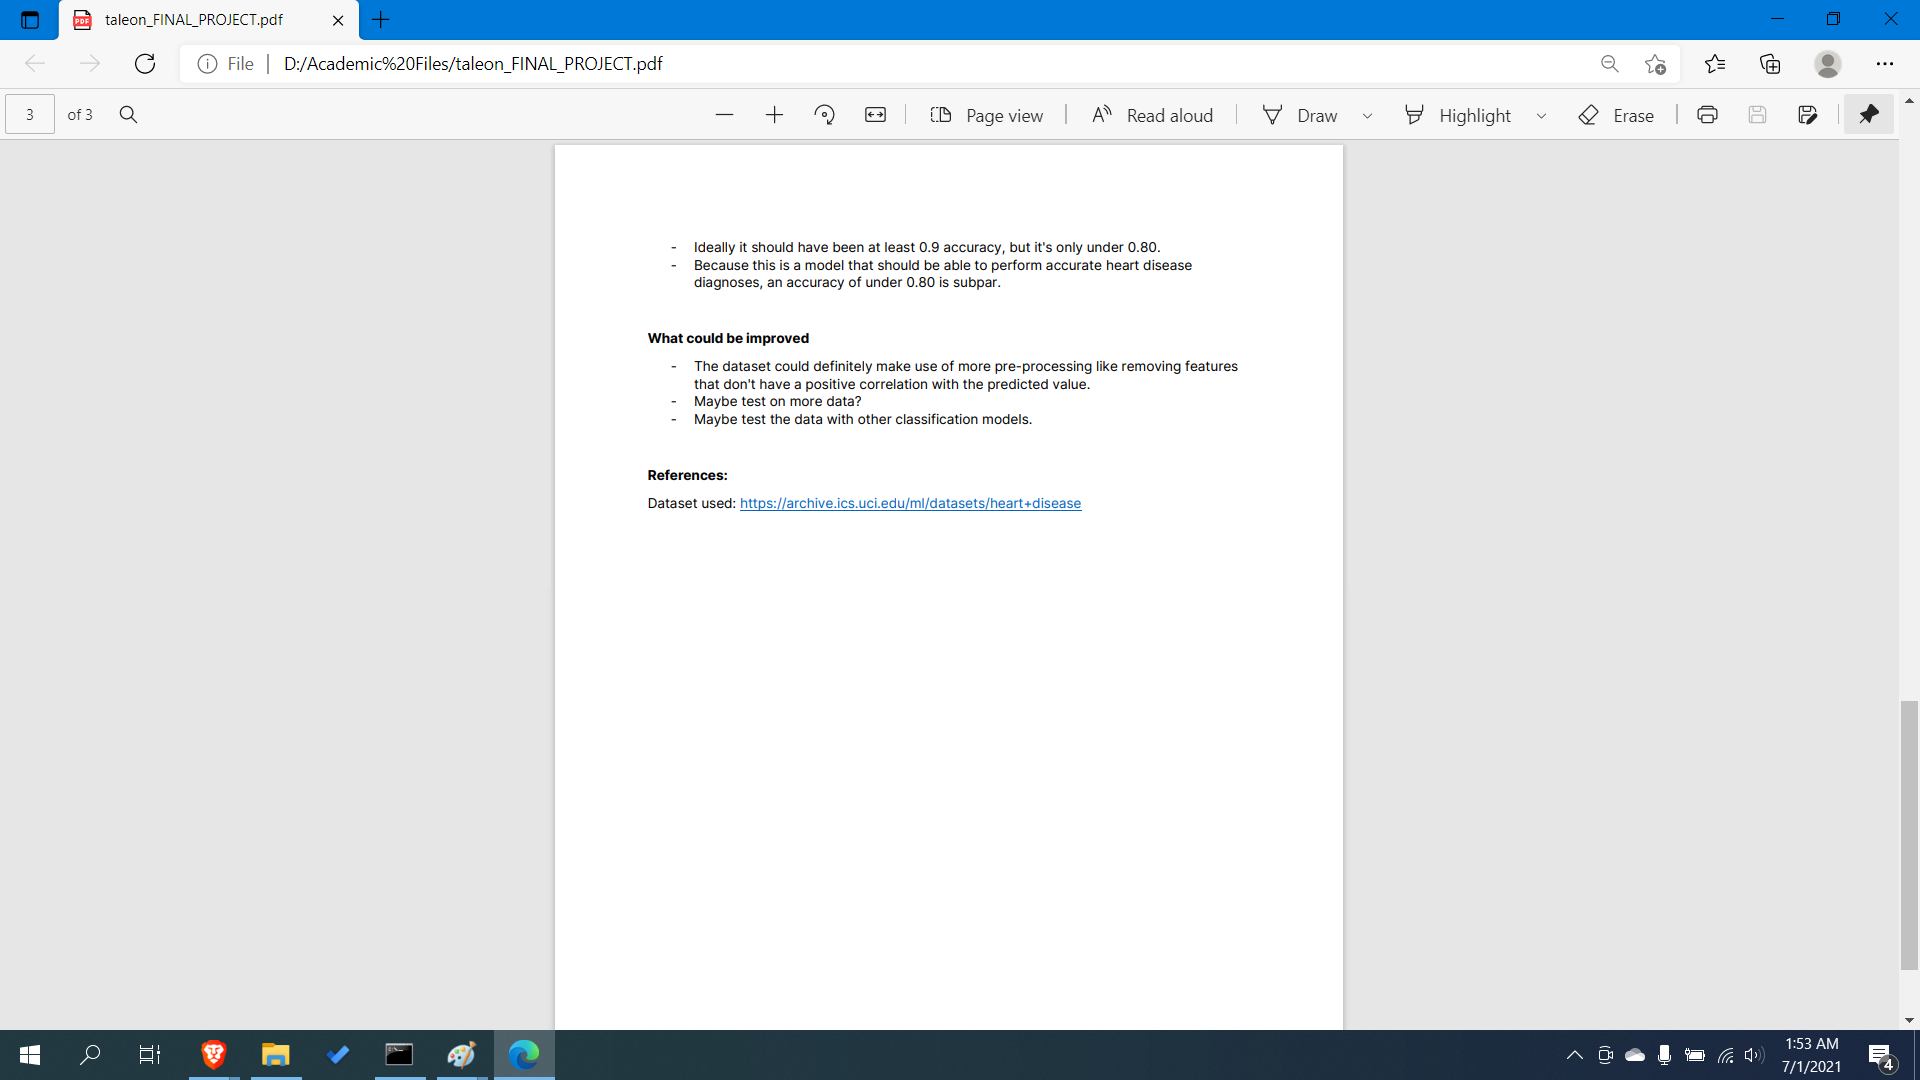